<a href="https://colab.research.google.com/github/xi200307/youtube_comments/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this project, I will be analyzing the sentiment of

This projects consists of three parts:

1. Import data (comments)
2.   Build a pre-trained sentiment analysis model
3.   Visualize the result






## Import data
The dataset is from Kaggle:

https://www.kaggle.com/datasets/nipunarora8/most-liked-comments-on-youtube/data

This dataset includes comments from different videos.


In [5]:
import pandas as pd

# import data and pick the Comment column
data = pd.read_csv('https://raw.githubusercontent.com/xi200307/youtube_comments/main/youtube_comments.csv.csv')
data = data[['Comment']]

data_list = data.values.tolist()
data_list

[['The people who liked this comment is officially before 7B views'],
 ["- Wait, it's 7B views\n- Always has been"],
 ['*Teacher: What is the population of the Earth?*\n\n*Me: Around one Despacito*'],
 ["Let's be honest this wasn't your recommendation you searched for it"],
 ['Types Of People:\n10% Enjoying Song \n90% Checking Views'],
 ['3.2 Million comments if you find mine your a legend'],
 ['claim your “here before 7 billion” tickets here, they’ll be out pretty soon 😼'],
 ['The ones who are NOT from Tik-Tok can like this comment.'],
 ['Song: spanish\nComments: English\nHotel: trivago'],
 ['Kimler burda😂🥰🌹'],
 ['The first viewer must feel like the king of the world...'],
 ["Just imagine how many people's come here everyday.."],
 ['hello everyone 🤗 Who came here to see the likes and views?😆\n👍'],
 ['3.5 M Comments if you find mine you are a legend'],
 ['*Let`s Go 7 Billion views > How many legends are come here before despacito 7B views*'],
 ['Who just came to check the views?'],
 ['

## Process the comments to make it more digestible for the program

Remove all the links, emojis, usernames mentioned and stopwords.

In [6]:
import nltk
import re


# prepare the stopwords set
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword_list=list(set(stopwords.words("english")))

# usernames mentioned
username_format = r'@[^\s]+'

# links format
link_format = r"(http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*"

# emoji format
emoji_format = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF""]+", flags=re.UNICODE)

def process(comments):
 result = []

 for comment in comments:
    # make all the letters lowercase
    c = comment[0]
    c = c.lower()


    c = re.sub(link_format, '', c)

    c = re.sub(username_format, '', c)
    c = re.sub(emoji_format,'',c)
    for word in c.split():
      if word in stopword_list:
        c = c.replace(word,'')
    result.append(c)
 return result
process(data_list)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[' people  liked  comment  officially  7b views',
 '- wait,  7b views\n- always  ',
 '*teacher:    population   earth?*\n\n*me: around one despacito*',
 "let's  honest    recommendation  searched  ",
 'types  people:\n10% enjoying song \n90% checking views',
 '3.2 million comments   find mine r  legend',
 'claim  “here  7 billion” tickets here, they’ll   pretty soon ',
 ' ones     tik-tok  like  comment.',
 'song: spanish\ncomments: english\nhotel: trivago',
 'kimler burda🥰',
 ' first viewer must feel like  king   world...',
 " imagine  many people's come  everyday..",
 'hello everyone 🤗  came   see  likes  views?\n',
 '3.5  coents   find ine    legend',
 '*let`s go 7 billion views >  many legends  come   despacito 7b views*',
 '  came  check  views?',
 'i’ll see  guys   “who’s watchg  2025” comments come ',
 '*despacito,*\n*youtube:  video exist?*\n\n*world population: yes*',
 "imagine  many army's coming  every seconds,minutes,hours.",
 'hey mikee',
 'world population: 7.7 billion\n\

## Analyze data
Create the positive and negative wordcloud (it might be a little weird because there are many other languages such as Spanish, French, German, etc)

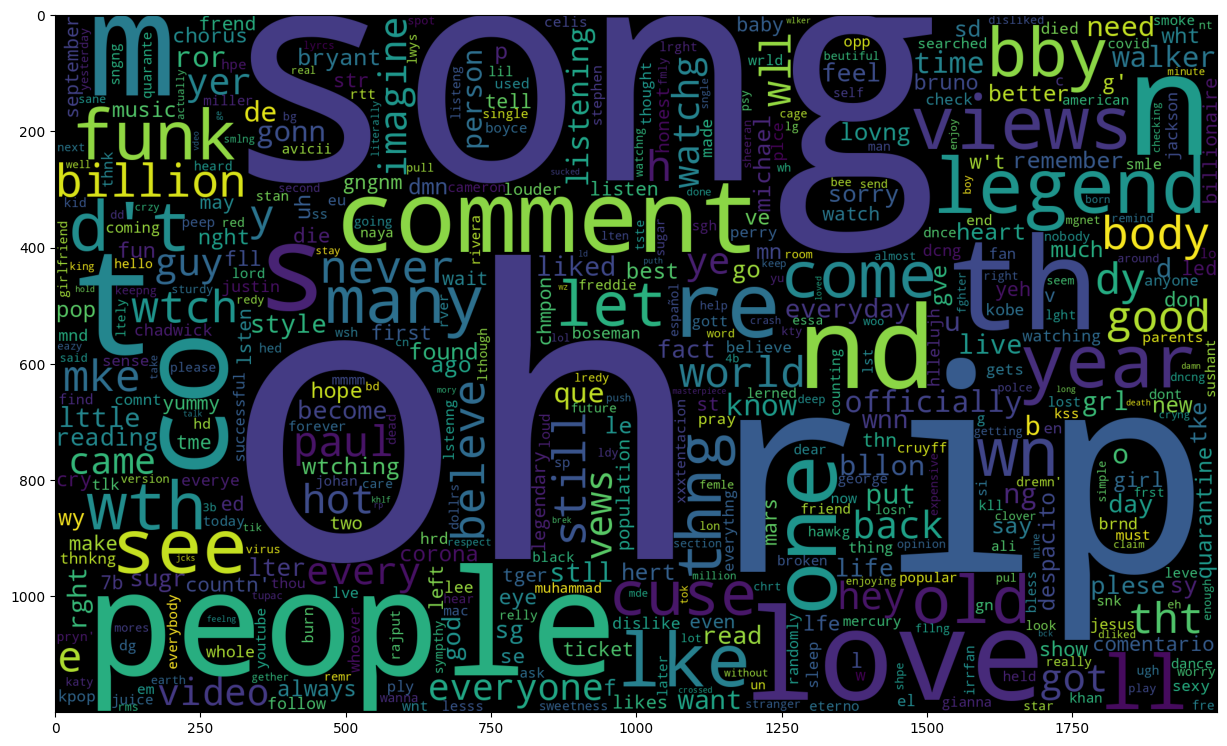

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
negative = process(data_list)[:1000]
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 2000 , height = 1200, collocations=False).generate(" ".join(negative))
plt.imshow(wc)

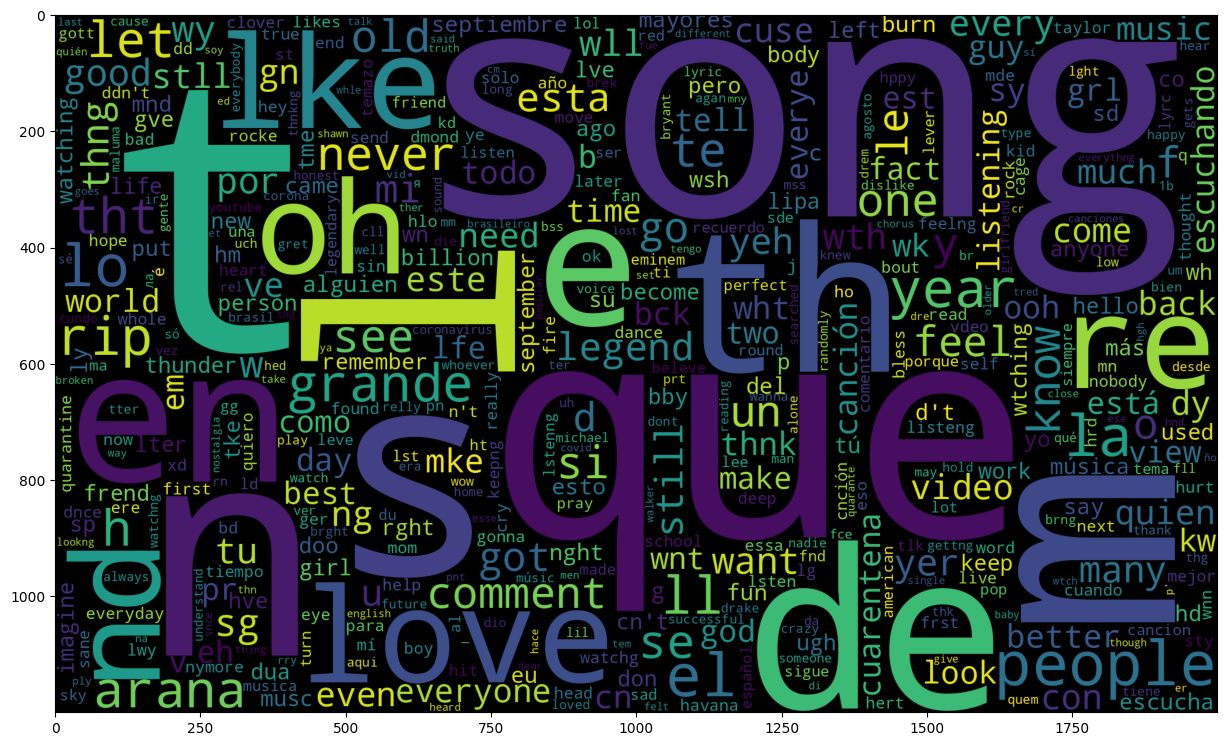

In [16]:
positive = process(data_list)[1000:]
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 2000 , height = 1200, collocations=False).generate(" ".join(positive))
plt.imshow(wc)